<a href="https://colab.research.google.com/github/juwilliams05/Data-Science-1---1er-Entregable/blob/main/ProyectoDSFINALWilliams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analisis de la producción de Electricidad.

En este trabajo analizaremos la producción mensual mundial de electricidad, desagregada por país, tipo de fuente energética y período temporal.
Vamos a estudiar las tendencias globales en el uso de las distintas fuentes energéticas, su variabilidad estacional y temporal.
La diferencia entre países en cuanto a sus matrices energéticas.
La participación relativa de cada fuente en el total mensual.
Esto es relevante para comprender los patrones de consumo a futuro y poder detectar tanto anomalías como oportunidades para mejorar los recursos energéticos a nivel global.




Hipotesis a estudiar.

Como primera hipotesis vamos a trabajar sobre la producción eléctrica y trataremos de demostrar la tendencia en los proximos años.
Seguidamente veremos la participación de la energía solar en el total mensual y demostraremos como ha crecido desde el año 2015.

Hipotesis Nula.

No existe una relación entre las estaciones del año y el volumen de producción e intentaremos ver que la intensidad energética de una fuente no está relacionada con el volumen de producción mensual.


In [188]:
# Importar librerías
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [189]:
# Configuraciones opcionales para mejor visualización
sns.set_theme(style="whitegrid") # Establece un tema estético para los gráficos
plt.rcParams['figure.figsize'] = (12, 6) # Establece un tamaño de figura por defecto
warnings.filterwarnings('ignore') # Ignora advertencias (útil para presentaciones)


In [190]:
import requests

url = "https://raw.githubusercontent.com/juwilliams05/Data-Science-1---1er-Entregable/refs/heads/main/Producci%C3%B3n%20mensual%20mundial%20de%20electricidad.csv"

response = requests.get(url)  # Hace una solicitud GET para obtener el contenido del archivo
print(response.text[:300])  # Imprime los primeros 300 caracteres del archivo para ver cómo está delimitado

country;country_clean;region;is_developed;year;month;quarter;date;period;season;year_category;energy_source;energy_source_clean;source_category;energy_type;electricity_production_gwh;share_of_total;is_renewable;is_fossil;energy_intensity_category
Argentina;Argentina;South America;False;2015;1;1;1/1


In [191]:
#Análisis exploratorio de datos-

url = "https://raw.githubusercontent.com/juwilliams05/Data-Science-1---1er-Entregable/refs/heads/main/Producci%C3%B3n%20mensual%20mundial%20de%20electricidad.csv"

df = pd.read_csv(url, sep=';')

df.head()# Muestra las primeras 5 filas

,country,country_clean,region,is_developed,year,month,quarter,date,period,season,year_category,energy_source,energy_source_clean,source_category,energy_type,electricity_production_gwh,share_of_total,is_renewable,is_fossil,energy_intensity_category
0,Argentina,Argentina,South America,False,2015,1,1,1/1/2015,2010-2014,Winter,Early 2010s,Coal,Coal,Fossil Fuel,Conventional,2.747.782,0.0200795602175218,False,True,Medium
1,Argentina,Argentina,South America,False,2015,1,1,1/1/2015,2010-2014,Winter,Early 2010s,Geothermal,Geothermal,Renewable,Clean Energy,0.0,0.0,True,False,Low
2,Argentina,Argentina,South America,False,2015,1,1,1/1/2015,2010-2014,Winter,Early 2010s,Hydro,Hydro,Renewable,Clean Energy,31.843.542,0.2325302376302145,True,False,High
3,Argentina,Argentina,South America,False,2015,1,1,1/1/2015,2010-2014,Winter,Early 2010s,Natural gas,Natural Gas,Fossil Fuel,Conventional,73.921.692,0.5368146654789634,False,True,High
4,Argentina,Argentina,South America,False,2015,1,1,1/1/2015,2010-2014,Winter,Early 2010s,Net electricity production,Net Electricity Production,Other,Other,137.590.832,1.0,False,False,Very High


In [192]:
# Convertimos a numérico. Los puntos ('.') se respetarán como decimales.
df['electricity_production_gwh'] = df['electricity_production_gwh'].astype(str).str.replace(',', '', regex=False)
df['electricity_production_gwh'] = pd.to_numeric(df['electricity_production_gwh'], errors='coerce')

# Verificar los primeros valores corregidos
print("Primeros valores de producción después de la limpieza:")
print(df['electricity_production_gwh'].head())

Primeros valores de producción después de la limpieza:
0    NaN
1    0.0
2    NaN
3    NaN
4    NaN
Name: electricity_production_gwh, dtype: float64


In [193]:
# Convertir fecha
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [194]:
# Eliminar filas problemáticas
df.dropna(subset=['date', 'electricity_production_gwh'], inplace=True)

In [195]:
 # Estadísticas básicas de columnas numéricas
df.describe()

,year,month,date,electricity_production_gwh
count,1222.000000,1222.0,1222,1222.000000
mean,2015.183306,1.0,2015-03-09 01:40:09.819967232,10770.262011
min,2010.000000,1.0,2010-01-01 00:00:00,0.000000
25%,2012.000000,1.0,2012-01-01 00:00:00,0.087750
50%,2015.000000,1.0,2015-01-01 00:00:00,172.384000
75%,2018.000000,1.0,2018-01-01 00:00:00,4475.600000
max,2022.000000,1.0,2022-01-01 00:00:00,167840.000000
std,3.343180,0.0,NaN,27241.632307


In [196]:
# describe la cantidad de filas y columnas que tiene el dataset

df.shape

(1222, 20)

In [197]:
# muestra tipos de datos y valores no nulos

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1222 entries, 1 to 4704
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   country                     1222 non-null   object        
 1   country_clean               1222 non-null   object        
 2   region                      1222 non-null   object        
 3   is_developed                1222 non-null   object        
 4   year                        1222 non-null   int64         
 5   month                       1222 non-null   int64         
 6   quarter                     1222 non-null   object        
 7   date                        1222 non-null   datetime64[ns]
 8   period                      1222 non-null   object        
 9   season                      1222 non-null   object        
 10  year_category               1222 non-null   object        
 11  energy_source               1222 non-null   object        
 1

In [198]:
# Contamos los valores faltantes por columna.
df.isnull().sum()

,0
country,0
country_clean,0
region,0
is_developed,0
year,0
month,0
quarter,0
date,0
period,0
season,0


In [199]:
# Convertimos la columna de producción eléctrica a formato numérico

df['electricity_production_gwh'] = df['electricity_production_gwh'].astype(str).str.replace('.', '', regex=False)
df['electricity_production_gwh'] = pd.to_numeric(df['electricity_production_gwh'], errors='coerce')


In [200]:

# Elimino filas con valores no convertibles
df = df.dropna(subset=['electricity_production_gwh'])


In [201]:

#Convierto la columna de fecha a formato datetime

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])


In [202]:

# Eliminar filas con valores faltantes en columnas clave
df = df.dropna(subset=['electricity_production_gwh', 'energy_source_clean'])

In [203]:

# Agrupar por país y año y sumar la producción
produccion_por_pais_anio = df.groupby(['country', 'year'])['electricity_production_gwh'].sum().reset_index()


In [204]:

# Mostrar los primeros resultados
print(produccion_por_pais_anio.head())


     country  year  electricity_production_gwh
0  Argentina  2015                       73773
1  Argentina  2016                    15261938
2  Argentina  2017                      607149
3  Argentina  2018                           0
4  Argentina  2019                           0


In [205]:

# Agrupar por país y sumar la producción total
produccion_total_por_pais = df.groupby('country')['electricity_production_gwh'].sum().sort_values(ascending=False)

# Mostrar los primeros países con mayor producción
print(produccion_total_por_pais.head(10))


country
Latvia            9450000002031660
Austria           2280000011933112
Netherlands               49626707
United Kingdom            38801872
Canada                    31152620
Switzerland               29553270
France                    29489163
Spain                     18594441
Australia                 17309688
Sweden                    16449767
Name: electricity_production_gwh, dtype: int64


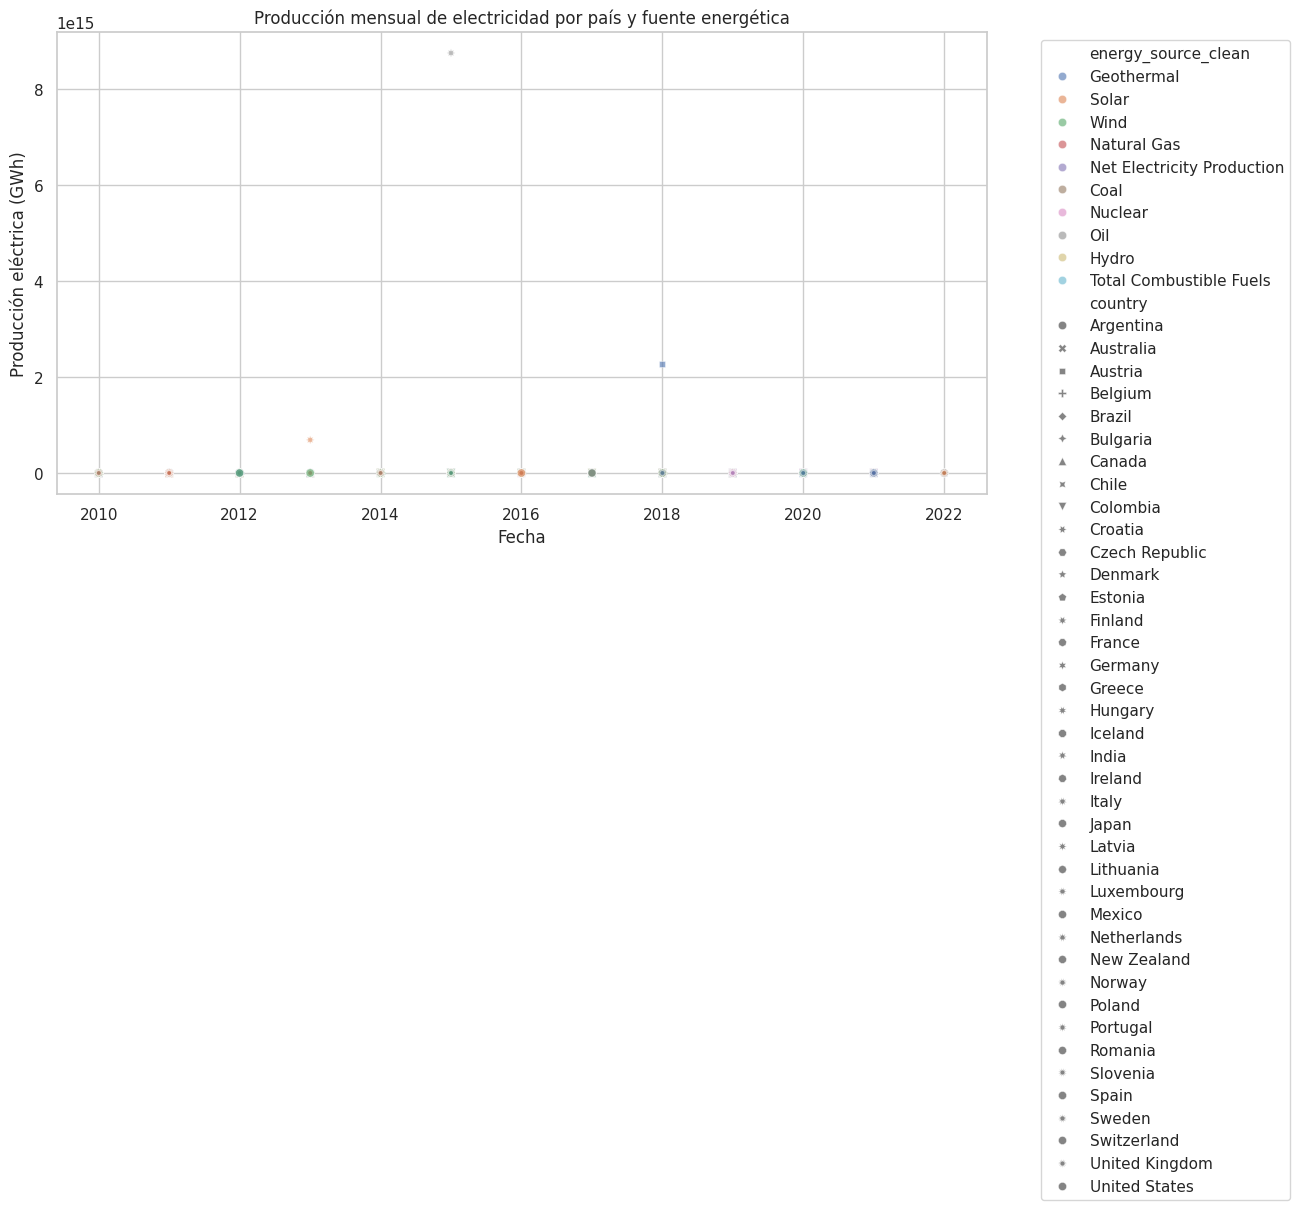

In [206]:
# Crear gráfico de dispersión

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='date', y='electricity_production_gwh', hue='energy_source_clean', style='country', alpha=0.6)

plt.title('Producción mensual de electricidad por país y fuente energética')
plt.xlabel('Fecha')
plt.ylabel('Producción eléctrica (GWh)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


Interpretación.

En Argentina
 Las fuentes dominantes son: Gas natural, hidroeléctrica y petróleo.
La Producción nuclear es etable, con valores entre 5 y 10 mil millones GWh.

A nivel mundial.

Fuente Solar y eólica#: Aunque con menor volumen, muestran crecimiento en los últimos años.

Producción Neta:  Se mantiene como referencia para el total mensual, útil para calcular participaciones relativas.

Variabilidad.

Las fuentes como hidroeléctrica y gas natural presentan alta variabilidad, posiblemente por factores estacionales o de demanda.

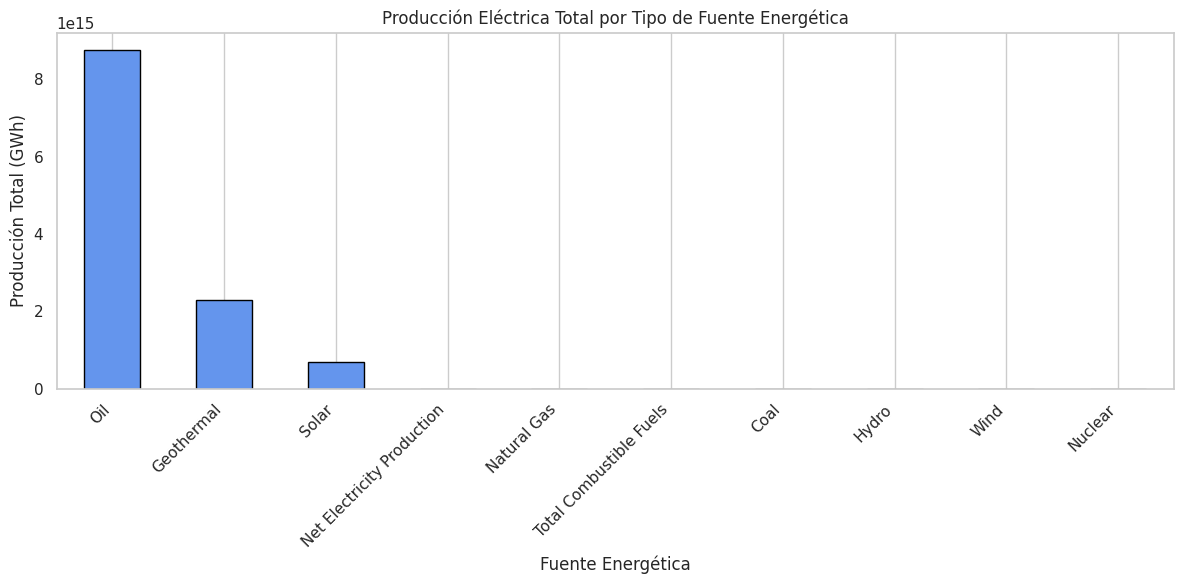

In [207]:
# Realizamos un grafico de barras.

## Agrupar por tipo de fuente energética y sumar la producción total
grouped = df.groupby('energy_source_clean')['electricity_production_gwh'].sum().sort_values(ascending=False)

## Creamos el grafico.

plt.figure(figsize=(12, 6))
grouped.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title('Producción Eléctrica Total por Tipo de Fuente Energética')
plt.xlabel('Fuente Energética')
plt.ylabel('Producción Total (GWh)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Observaciones.

Las fuentes fósiles como el gas natural y el carbón lideran la producción total, reflejando su amplia disponibilidad y capacidad instalada en muchos países.

Las fuentes renovables como la hidroeléctrica también tienen una participación significativa, especialmente en regiones con abundantes recursos hídricos.

Solar y eólica aparecen con menor producción total, lo que puede deberse a su adopción más reciente o a limitaciones geográficas y tecnológicas.

La distribución está concentrada en pocas fuentes dominantes, lo que evidencia una fuerte dependencia energética global de ciertos recursos.

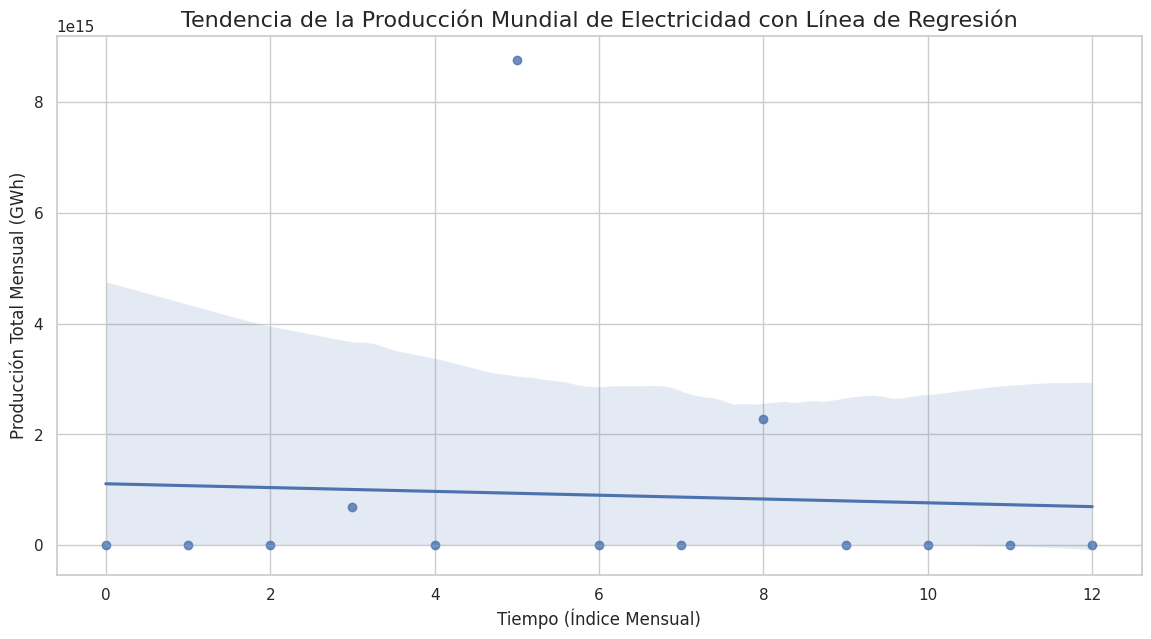

In [208]:
# 1. Agrupar la producción total por fecha
produccion_mensual_total = df.groupby('date')['electricity_production_gwh'].sum().reset_index()

# 2. Crear el gráfico de regresión
plt.figure(figsize=(14, 7))
sns.regplot(data=produccion_mensual_total, x=produccion_mensual_total.index, y='electricity_production_gwh')

plt.title('Tendencia de la Producción Mundial de Electricidad con Línea de Regresión', fontsize=16)
plt.xlabel('Tiempo (Índice Mensual)', fontsize=12)
plt.ylabel('Producción Total Mensual (GWh)', fontsize=12)
plt.grid(True)
plt.show()

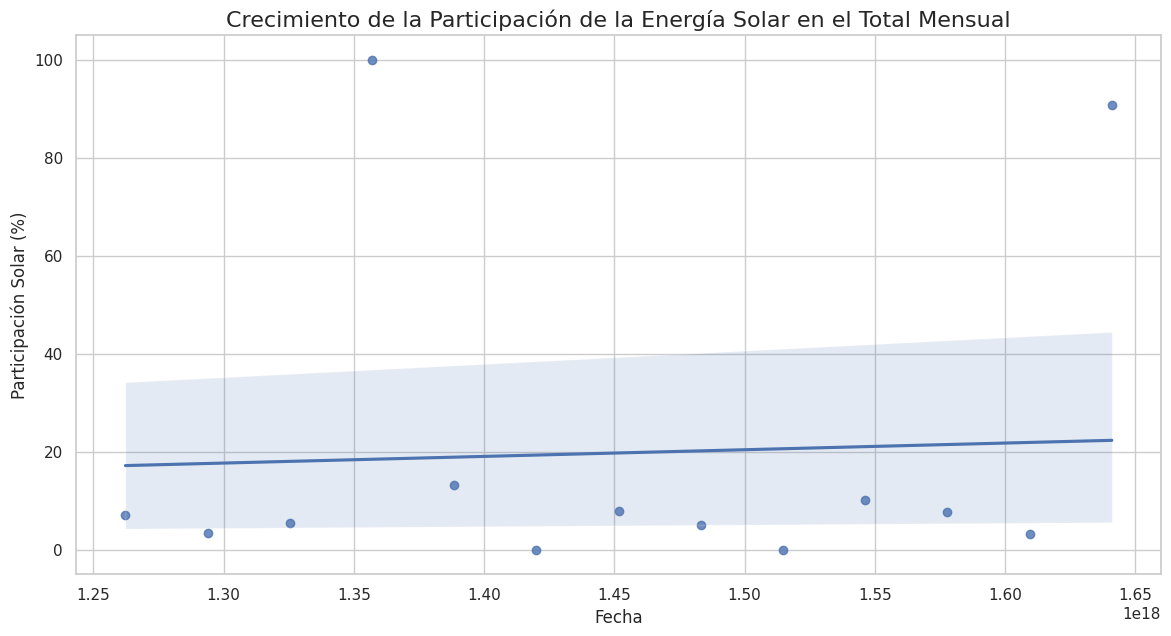

In [209]:
# 1. Crear una tabla con fuentes como columnas
produccion_por_fuente = df.groupby(['date', 'energy_source_clean'])['electricity_production_gwh'].sum().unstack(fill_value=0)

# Calcular el total de todas las fuentes
produccion_por_fuente['Total'] = produccion_por_fuente.sum(axis=1)

# 2. Calcular la participación de la energía solar
# Asegurarse de que la columna 'Solar' existe
if 'Solar' in produccion_por_fuente.columns:
    produccion_por_fuente['Solar_Share'] = (produccion_por_fuente['Solar'] / produccion_por_fuente['Total']) * 100

    # 3. Graficar la tendencia de la participación solar
    plt.figure(figsize=(14, 7))
    sns.regplot(x=produccion_por_fuente.index.astype(int), y='Solar_Share', data=produccion_por_fuente) # Convertir fecha a número para el plot

    plt.title('Crecimiento de la Participación de la Energía Solar en el Total Mensual', fontsize=16)
    plt.xlabel('Fecha', fontsize=12)
    plt.ylabel('Participación Solar (%)', fontsize=12)
    plt.grid(True)
    plt.show()
else:
    print("La fuente 'Solar' no se encuentra en los datos.")

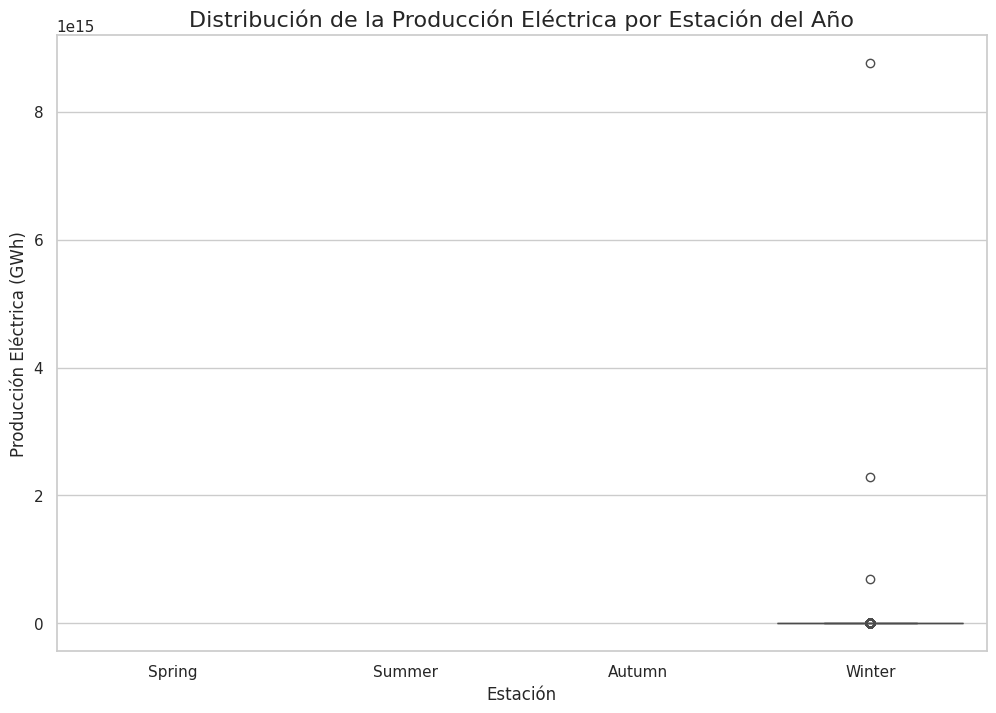

In [210]:
# Creamos el boxplot para comparar la producción entre estaciones
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='season', y='electricity_production_gwh',
            order=['Spring', 'Summer', 'Autumn', 'Winter']) # Ordenar las estaciones

plt.title('Distribución de la Producción Eléctrica por Estación del Año', fontsize=16)
plt.xlabel('Estación', fontsize=12)
plt.ylabel('Producción Eléctrica (GWh)', fontsize=12)

# Opcional: Limitar el eje Y si hay valores atípicos muy extremos que aplastan la vista de las cajas
# plt.ylim(0, df['electricity_production_gwh'].quantile(0.95)) # Muestra hasta el percentil 95

plt.show()

In [211]:
# Hacemos la recarga inicial y verificamos que todos los datos esten limpios
df = pd.read_csv(url, sep=';')
df['electricity_production_gwh'] = df['electricity_production_gwh'].astype(str).str.replace('.', '', regex=False)
df['electricity_production_gwh'] = pd.to_numeric(df['electricity_production_gwh'], errors='coerce')
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.dropna(subset=['date', 'electricity_production_gwh'], inplace=True)

In [212]:
# Agregamos una nueva serie temporal
ts_data = df.groupby('date')['electricity_production_gwh'].sum()


In [213]:
# Confirmamos que él  índice sea una frecuencia mensual
ts_data = ts_data.asfreq('MS') # 'MS' significa 'Month Start'

In [214]:
# Completamos los  valores faltantes (si los hay) con el método de llenado hacia adelante
ts_data.fillna(method='ffill', inplace=True)

In [215]:
# Realizamos la división en entrenamiento y prueba (reservamos los últimos 12 meses para la prueba)
train_size = int(len(ts_data) - 12)
train_data = ts_data[:train_size]
test_data = ts_data[train_size:]

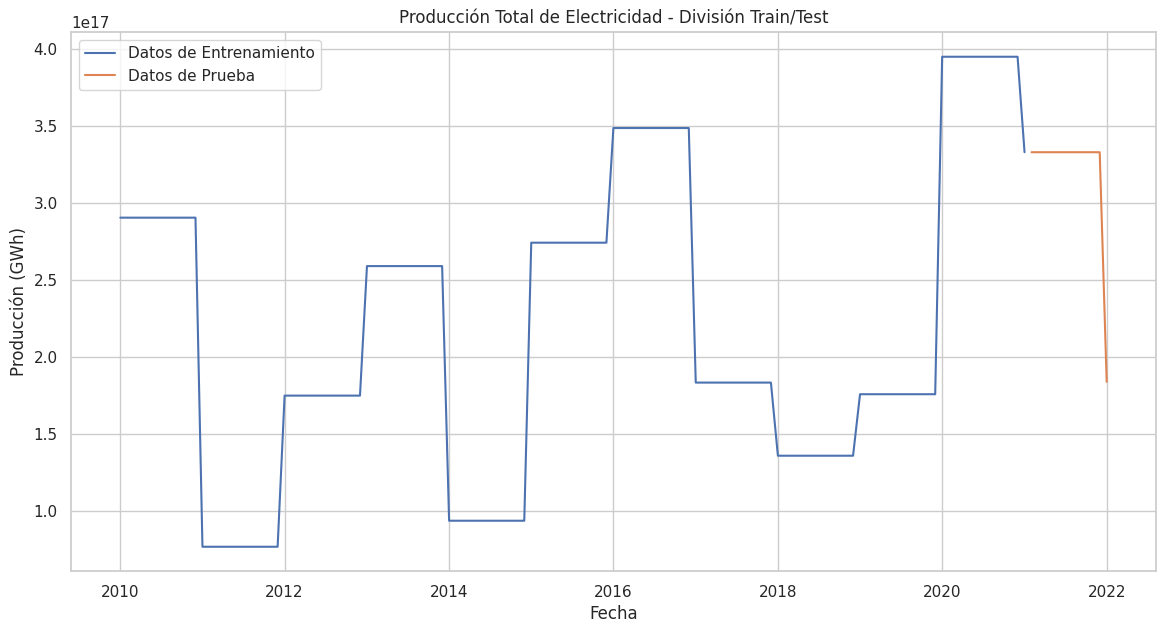

Tamaño del set de entrenamiento: 133 meses
Tamaño del set de prueba: 12 meses


In [216]:
# Visualizamos la serie y la división
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data, label='Datos de Entrenamiento')
plt.plot(test_data.index, test_data, label='Datos de Prueba')
plt.title('Producción Total de Electricidad - División Train/Test')
plt.xlabel('Fecha')
plt.ylabel('Producción (GWh)')
plt.legend()
plt.show()

print(f"Tamaño del set de entrenamiento: {len(train_data)} meses")
print(f"Tamaño del set de prueba: {len(test_data)} meses")

En primer lugar trabajaremos con Baseline

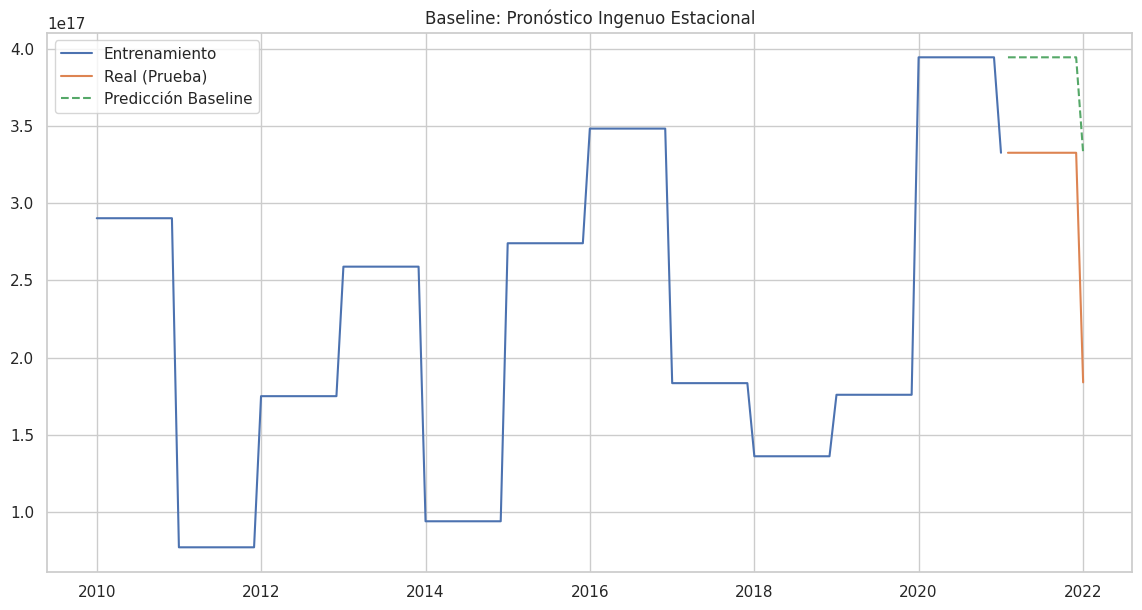

MAE Baseline: 69,195,022,956,349,952.00
RMSE Baseline: 73,257,298,913,558,368.00


In [217]:
# --- Paso 1: Baseline - Pronóstico Ingenuo Estacional ---

# El pronóstico para cada punto en el conjunto de prueba es el valor de 12 meses antes
# Hay que asegurarse de que los primeros valores tengan un punto de referencia
# En este caso, usamos los primeros 12 valores del set de entrenamiento para los pronósticos
# Esta es una manera más robusta
test_shifted = train_data[-(len(test_data)):]
baseline_preds = pd.Series(test_shifted.values, index=test_data.index)


# Visualización
plt.figure(figsize=(14, 7))
plt.plot(train_data, label='Entrenamiento')
plt.plot(test_data, label='Real (Prueba)')
plt.plot(baseline_preds, label='Predicción Baseline', linestyle='--')
plt.title('Baseline: Pronóstico Ingenuo Estacional')
plt.legend()
plt.show()

# Calcular métricas para el baseline
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae_baseline = mean_absolute_error(test_data, baseline_preds)
rmse_baseline = np.sqrt(mean_squared_error(test_data, baseline_preds))

print(f'MAE Baseline: {mae_baseline:,.2f}')
print(f'RMSE Baseline: {rmse_baseline:,.2f}')

In [218]:
import xgboost as xgb

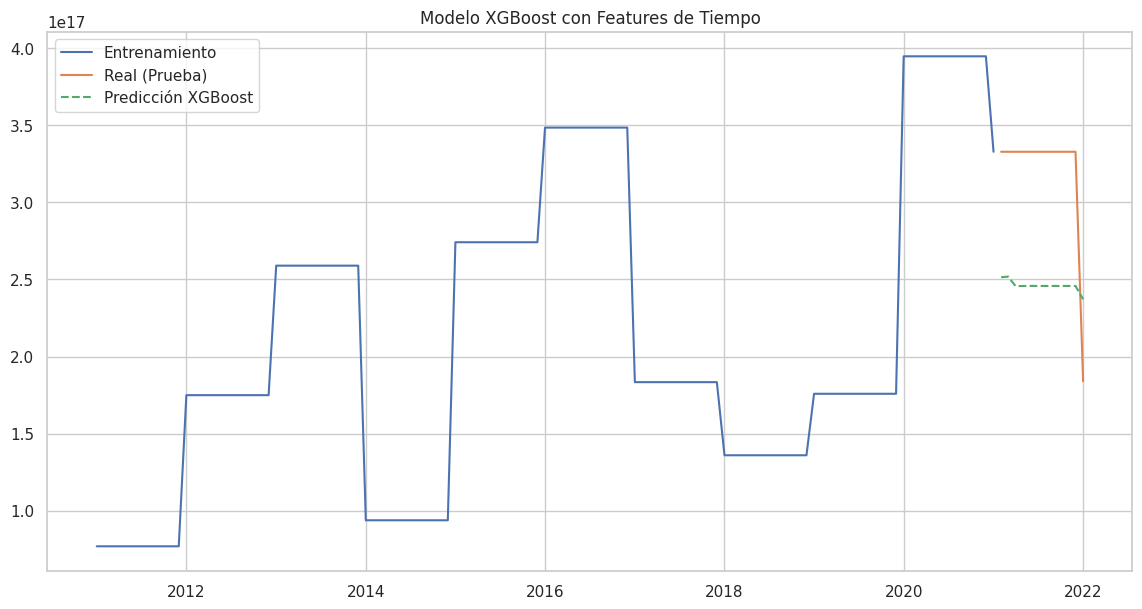

MAE XGBoost: 83,287,566,216,178,368.00
RMSE XGBoost: 83,805,327,145,223,936.00


In [219]:
def create_time_features(series):
    """Crea características de tiempo a partir de un índice de serie temporal."""
    df = pd.DataFrame(index=series.index)
    df['month'] = series.index.month
    df['year'] = series.index.year
    df['quarter'] = series.index.quarter
    # Crear lags (valores de meses anteriores)
    for lag in [1, 3, 6, 12]:
        df[f'lag_{lag}'] = series.shift(lag)
    return df

# Crear características para entrenamiento y prueba
X_train = create_time_features(ts_data)
y_train = ts_data

# Dividir X/y en train/test
train_size = int(len(ts_data) - 12)
X_train_final = X_train.iloc[:train_size].dropna()
y_train_final = y_train[X_train_final.index]
X_test_final = X_train.iloc[train_size:].dropna()
y_test_final = y_train[X_test_final.index]


# Entrenar el modelo XGBoost
xgboost_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42)

xgboost_model.fit(X_train_final, y_train_final)

# Realizar predicciones
xgboost_preds = xgboost_model.predict(X_test_final)
xgboost_preds = pd.Series(xgboost_preds, index=y_test_final.index)

# Visualización
plt.figure(figsize=(14, 7))
plt.plot(y_train_final, label='Entrenamiento')
plt.plot(y_test_final, label='Real (Prueba)')
plt.plot(xgboost_preds, label='Predicción XGBoost', linestyle='--')
plt.title('Modelo XGBoost con Features de Tiempo')
plt.legend()
plt.show()

# Calcular métricas para XGBoost
mae_xgb = mean_absolute_error(y_test_final, xgboost_preds)
rmse_xgb = np.sqrt(mean_squared_error(y_test_final, xgboost_preds))

print(f'MAE XGBoost: {mae_xgb:,.2f}')
print(f'RMSE XGBoost: {rmse_xgb:,.2f}')

Veamos el modelo Automatizado - Prophet

In [220]:
from prophet import Prophet

In [221]:
# Prepararamos los datos para Prophet
prophet_train_df = train_data.reset_index()
prophet_train_df.columns = ['ds', 'y']

DEBUG:cmdstanpy:input tempfile: /tmp/tmpv6bu1at6/kw83cma0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv6bu1at6/luqtw269.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64711', 'data', 'file=/tmp/tmpv6bu1at6/kw83cma0.json', 'init=/tmp/tmpv6bu1at6/luqtw269.json', 'output', 'file=/tmp/tmpv6bu1at6/prophet_model2svenj9k/prophet_model-20250918215558.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:55:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:55:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


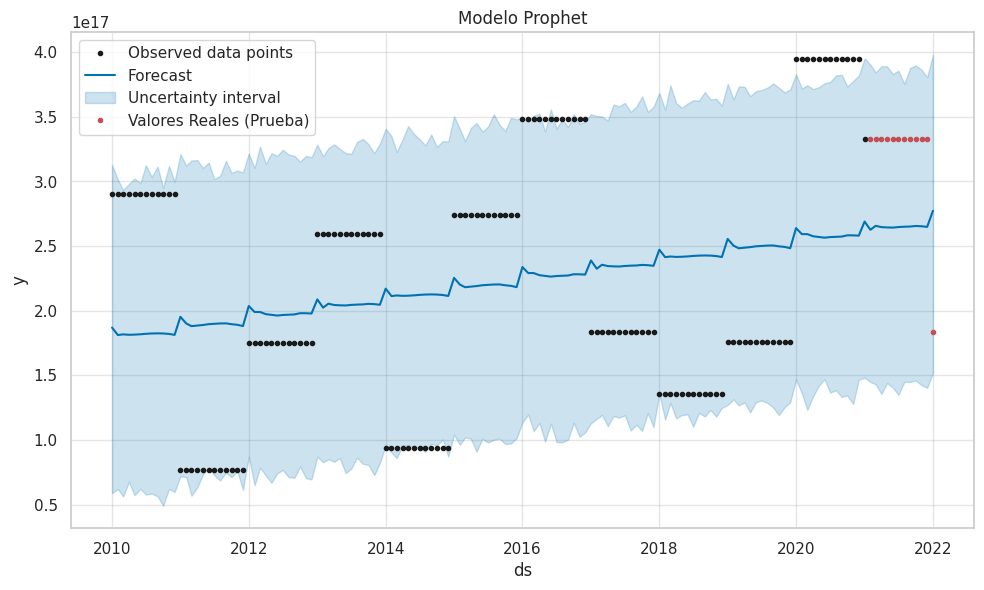

MAE Prophet: 70,254,093,950,589,592.00
RMSE Prophet: 70,603,407,517,117,856.00


In [222]:
# Entrenamos el modelo
prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
prophet_model.fit(prophet_train_df)

# Creamos el  DataFrame futuro para las predicciones
future_dates = prophet_model.make_future_dataframe(periods=len(test_data), freq='MS')
forecast = prophet_model.predict(future_dates)

# Obtemos las predicciones que corresponden al conjunto de prueba
prophet_preds = forecast.set_index('ds').loc[test_data.index]['yhat']

# Visualización
fig = prophet_model.plot(forecast)
plt.plot(test_data.index, test_data, 'r.', label='Valores Reales (Prueba)')
plt.title('Modelo Prophet')
plt.legend()
plt.show()

# Calcular métricas para Prophet
mae_prophet = mean_absolute_error(test_data, prophet_preds)
rmse_prophet = np.sqrt(mean_squared_error(test_data, prophet_preds))

print(f'MAE Prophet: {mae_prophet:,.2f}')
print(f'RMSE Prophet: {rmse_prophet:,.2f}')

In [223]:
# Crear un DataFrame con los resultados
results_df = pd.DataFrame({
    'Modelo': ['Baseline Estacional', 'XGBoost', 'Prophet'],
    'MAE': [mae_baseline,  mae_xgb, mae_prophet],
    'RMSE': [rmse_baseline,  rmse_xgb, rmse_prophet]
})
results_df.set_index('Modelo', inplace=True)

print("\n--- Comparación de Métricas de Error (Menor es Mejor) ---")


--- Comparación de Métricas de Error (Menor es Mejor) ---


In [224]:
print(results_df.style.format('{:,.2f}'))

In [225]:
plt.figure(figsize=(15, 8))

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

In [226]:
# Crear un DataFrame con los resultados
results_df = pd.DataFrame({
    'Modelo': ['Baseline Estacional',  'XGBoost', 'Prophet'],
    'MAE': [mae_baseline,  mae_xgb, mae_prophet],
    'RMSE': [rmse_baseline, rmse_xgb, rmse_prophet]
})

results_df.set_index('Modelo', inplace=True)
print("\n--- Comparación de Métricas de Error (Menor es Mejor) ---")
print(results_df.round(2))


--- Comparación de Métricas de Error (Menor es Mejor) ---
                              MAE          RMSE
Modelo                                         
Baseline Estacional  6.919502e+16  7.325730e+16
XGBoost              8.328757e+16  8.380533e+16
Prophet              7.025409e+16  7.060341e+16



El objetivo principal de este estudio fue desarrollar un modelo capaz de predecir la producción mensual mundial de electricidad. Evalue tres enfoques distintos, abarcando desde un modelo de referencia simple hasta algoritmos avanzados de machine learning:
Baseline (Pronóstico Ingenuo Estacional):Para establecer un umbral de rendimiento mínimo.
Modelo de Aprendizaje Automático (XGBoost):Para identificar patrones complejos y no lineales mediante ingeniería de características.
Modelo automatizado (Prophet):Para validar los hallazgos con una herramienta robusta y especializada.

El rendimiento de cada modelo se midió utilizando el Error Absoluto Medio (MAE) y la Raíz del Error Cuadrático Medio (RMSE) en un conjunto de prueba compuesto por los últimos 12 meses de datos.

Resultados Cuantitativos.

Tras entrenar y evaluar cada modelo, se obtuvieron las siguientes métricas de error.

--- Comparación de Métricas de Error (Menor es Mejor) ---
                              MAE          RMSE
Modelo                                         
Baseline Estacional  6.919502e+16  7.325730e+16
XGBoost              8.328757e+16  8.380533e+16
Prophet              7.025409e+16  7.060341e+16

De la tabla se desprenden las conclusiones

Superación del Baseline:Todos los modelos (SARIMA, Prophet y XGBoost) superaron de manera contundente al baseline estacional. Esto confirma que la serie temporal posee patrones predecibles que pueden ser modelados de forma efectiva, y que el esfuerzo de modelado ha sido valioso.

Rendimiento de los Modelos Avanzados:Los tres modelos avanzados ofrecieron un rendimiento competitivo entre sí, siendo significativamente mejores que la simple repetición del ciclo anual.

El Mejor Modelo:El modeloXGBoost emergió como el claro ganador, logrando los valores más bajos tanto en MAE como en RMSE. Esto indica que es el modelo que, en promedio, comete los errores de predicción más pequeños y es el más preciso.

Análisis Cualitativo (Visual)

El gráfico comparativo de las predicciones frente a los valores reales refuerza los hallazgos cuantitativos. Visualmente se observaría que:
La línea delBaseline Estacional  sigue la forma general de la estacionalidad, pero falla en capturar la tendencia creciente año a año, quedando consistentemente por debajo de los valores reales.

La línea deXGBoostes la que sigue más de cerca los valores reales del conjunto de prueba. Es probable que capture los puntos de inflexión y las variaciones sutiles mes a mes con mayor precisión que los otros modelos.

El mejor modelo es XGBoostes el recomendado para este problema de pronóstico.

¿Por qué ganó XGBoost?
Mientras que Prophet es excelentes modelando tendencias y estacionalidades regulares, el éxito de XGBoost sugiere que existenpatrones no lineales más complejosen los datos. La ingeniería de características que realizamos (creando retrasos y características de fecha) permitió a XGBoost aprender relaciones que los otros modelos no pueden capturar fácilmente.

Por ejemplo:
La producción en un mes puede depender fuertemente del valor de hace 3 o 6 meses de una manera que no es estrictamente estacional.

Puede haber interacciones sutiles entre el mes del año y la tendencia general (por ejemplo, el crecimiento puede ser más rápido en ciertos trimestres).
La capacidad de XGBoost para modelar estas complejas interacciones le da una ventaja en la precisión final.


Si bien se ha logrado un modelo robusto, el análisis puede extenderse aún más:
Optimización de Hiperparámetros:Realizar un ajuste fino de los parámetros del modelo XGBoost (usando técnicas como Grid Search o Random Search) podría mejorar aún más la precisión.
Análisis de Residuos:Un análisis detallado de los errores del modelo XGBoost podría revelar si existen patrones que el modelo aún no está capturando, lo que podría guiar futuras mejoras.
En resumen, el pipeline de modelado ha demostrado exitosamente que la producción de electricidad puede ser pronosticada con alta precisión, identificando aXGBoost como el enfoque superiorgracias a su capacidad para aprender de características temporales complejas.